In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("abc_company_employees.csv")  
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


### Preprocessing (Height Correction)

In [2]:
# Replace 'height' column with random values between 150 and 180
df['height'] = np.random.randint(150, 181, size=len(df))

# Check the update
df[['height']].head()


,height
0,165
1,155
2,177
3,160
4,170


### Analysis Task 1 - Team Distribution

In [5]:
# Count and percentage of employees per team (with correct column name)
team_counts = df['Team'].value_counts()
team_percent = df['Team'].value_counts(normalize=True) * 100

# Combine into a DataFrame
team_distribution = pd.DataFrame({'Count': team_counts, 'Percentage': team_percent.round(2)})
team_distribution


,Count,Percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


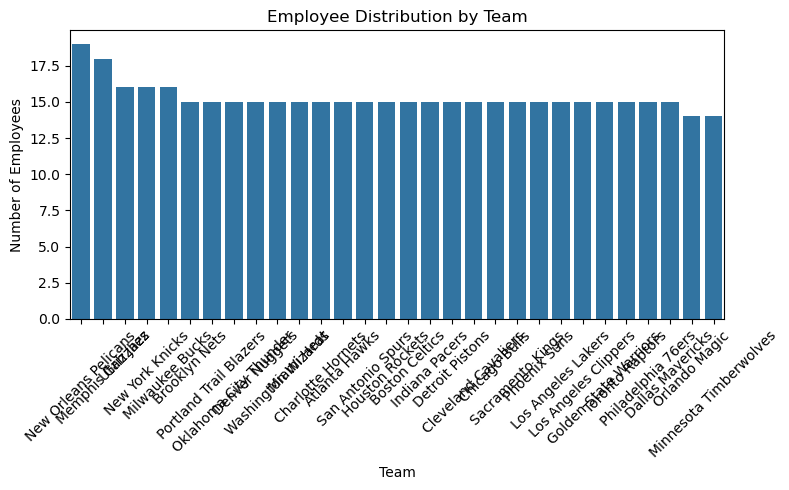

In [6]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=team_distribution.index, y=team_distribution['Count'])
plt.title("Employee Distribution by Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### egregate Employees Based on Their Positions

In [8]:
# Count of employees per position
position_counts = df['Position'].value_counts()
position_counts



Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

C:\Users\rahul\AppData\Local\Temp\ipykernel_16560\3873782659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette='Set2')


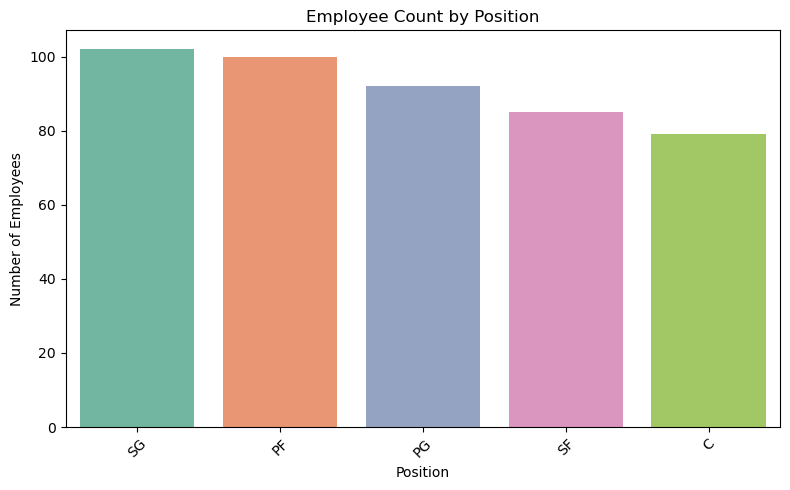

In [9]:
# Bar chart for positions
plt.figure(figsize=(8, 5))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='Set2')
plt.title("Employee Count by Position")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_16560\960978598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_df, x='Position', y='Count', palette='Set2')


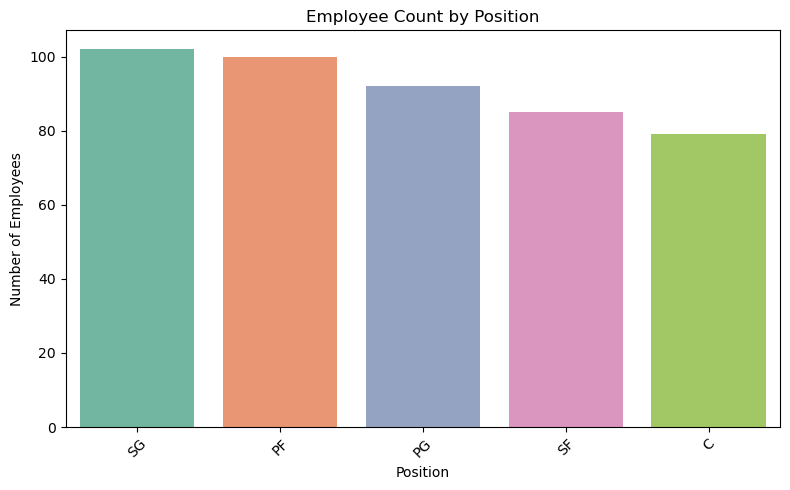

In [10]:
# Convert the counts to a DataFrame for cleaner plotting
position_df = position_counts.reset_index()
position_df.columns = ['Position', 'Count']

# Updated plot
plt.figure(figsize=(8, 5))
sns.barplot(data=position_df, x='Position', y='Count', palette='Set2')
plt.title("Employee Count by Position")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Identify the Predominant Age Group

#### Create Age Groups

In [11]:
# Create age group bins
age_bins = [20, 30, 40, 50, 60]  # You can adjust this based on your dataset's age range
age_labels = ['20-29', '30-39', '40-49', '50-59']

# Add a new column for age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count by age group
age_group_counts = df['Age_Group'].value_counts().sort_index()
age_group_counts


Age_Group
20-29    334
30-39    119
40-49      3
50-59      0
Name: count, dtype: int64

### Plot the Age Group Distribution

C:\Users\rahul\AppData\Local\Temp\ipykernel_16560\1134860009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel')


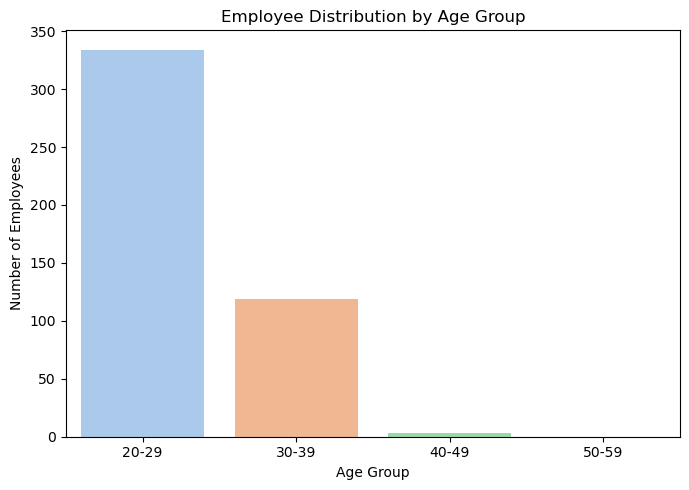

In [12]:
plt.figure(figsize=(7, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel')
plt.title("Employee Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()


## Team and Position with the Highest Salary Expenditure

1: Total Salary by Team

In [13]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
team_salary


Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     59709697.0
Boston 

In [14]:
# Highest spending team
highest_team = team_salary.idxmax()
highest_team_salary = team_salary.max()
print(f"Team with highest salary expenditure: {highest_team} (${highest_team_salary})")


Team with highest salary expenditure: Cleveland Cavaliers ($106988689.0)


#### 2: Total Salary by Position

In [15]:
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
position_salary


Position
C     466377332.0
PG    446848971.0
PF    442560850.0
SF    408020976.0
SG    396976258.0
Name: Salary, dtype: float64

In [16]:
# Highest spending position
highest_position = position_salary.idxmax()
highest_position_salary = position_salary.max()
print(f"Position with highest salary expenditure: {highest_position} (${highest_position_salary})")


Position with highest salary expenditure: C ($466377332.0)


### 3: Visualizations

C:\Users\rahul\AppData\Local\Temp\ipykernel_16560\1590332288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_salary.index, y=team_salary.values, palette='coolwarm')


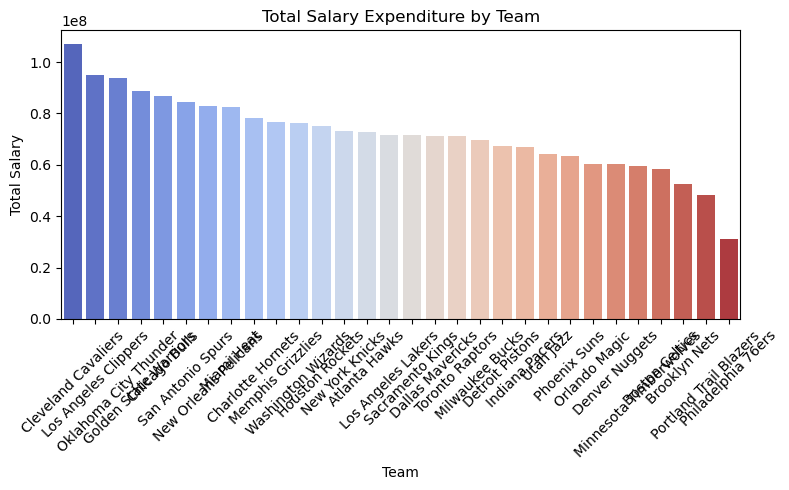

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=team_salary.index, y=team_salary.values, palette='coolwarm')
plt.title("Total Salary Expenditure by Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Position Salary Plot

C:\Users\rahul\AppData\Local\Temp\ipykernel_16560\1130071514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_salary.index, y=position_salary.values, palette='coolwarm')


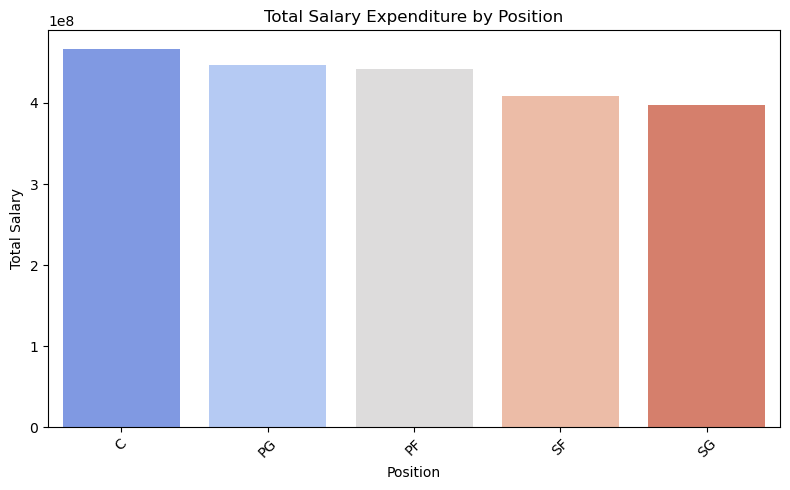

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=position_salary.index, y=position_salary.values, palette='coolwarm')
plt.title("Total Salary Expenditure by Position")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Correlation Between Age and Salary

1: Calculate Correlation


In [19]:
# Correlation between age and salary
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")


Correlation between Age and Salary: 0.21


### 2: Visualize with a Scatter Plot

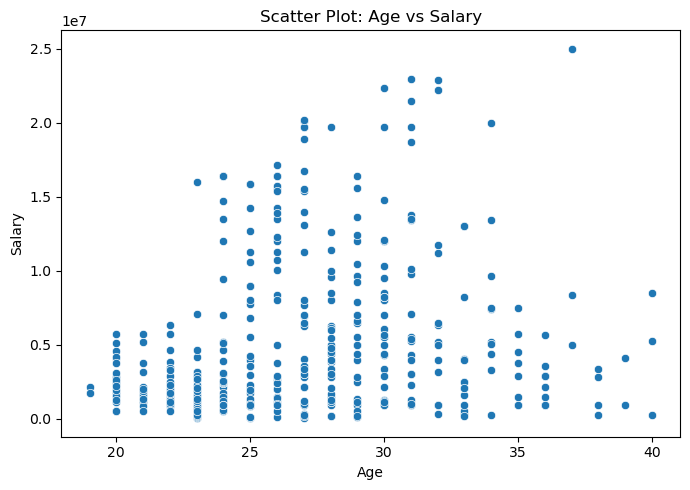

In [20]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title("Scatter Plot: Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()


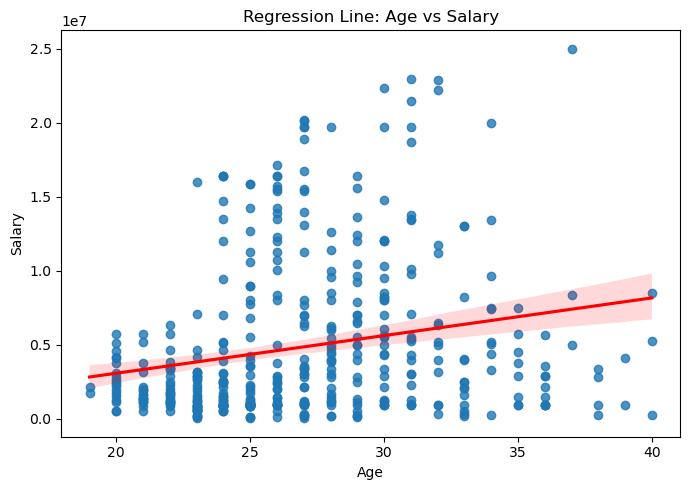

In [21]:
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x='Age', y='Salary', line_kws={"color": "red"})
plt.title("Regression Line: Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()
